In [1]:
import pandas as pd
import yfinance as yf


stockNo = "600519.SS"
start_date = '2015-01-01'
df = yf.download(stockNo, start=start_date)
df = df.reset_index()
df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-05,174.545456,185.672729,173.636368,184.109085,164.205185,10396668
1,2015-01-06,181.818176,184.145447,178.199997,179.845459,160.402512,6052201
2,2015-01-07,178.218185,181.363632,172.718185,175.399994,156.437622,6027762
3,2015-01-08,176.363632,176.836365,172.854538,174.327271,155.480896,4457783
4,2015-01-09,173.090912,177.972733,172.827271,173.009094,154.305237,5938042
...,...,...,...,...,...,...,...
1890,2022-10-17,1726.000000,1727.989990,1697.800049,1718.500000,1718.500000,3354951
1891,2022-10-18,1725.000000,1730.000000,1701.000000,1705.829956,1705.829956,2808277
1892,2022-10-19,1701.979980,1701.979980,1648.000000,1648.000000,1648.000000,6012093
1893,2022-10-20,1621.000000,1668.430054,1611.000000,1643.500000,1643.500000,4277807


In [2]:
from stocker import Stocker
stock = Stocker(stockNo, df)

stockNo : 600519.SS Stocker Initialized. Data covers 2015-01-05 00:00:00 to 2022-10-21 00:00:00.


Maximum Adj. Close = 2601.00 on 2021-02-10 00:00:00.
Minimum Adj. Close = 158.23 on 2015-02-05 00:00:00.
Current Adj. Close = 1624.00 on 2022-10-21 00:00:00.



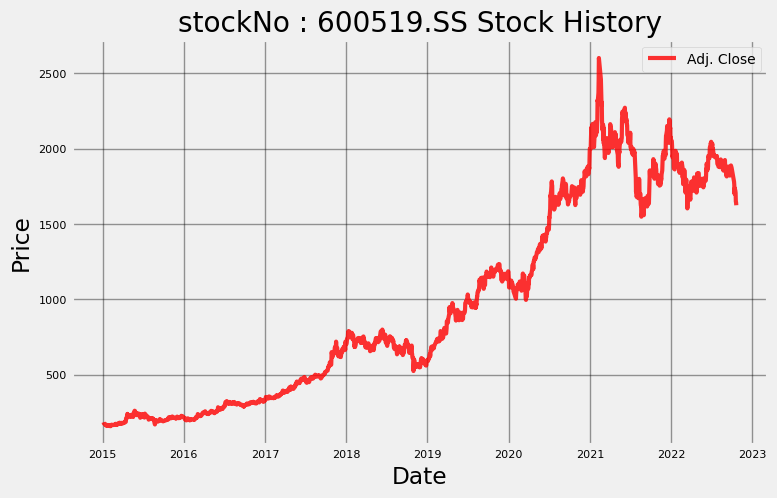

In [3]:
stock.plot_stock()

15:12:12 - cmdstanpy - INFO - Chain [1] start processing
15:12:12 - cmdstanpy - INFO - Chain [1] done processing


Predicted Price on 2022-10-31 00:00:00 = $1703.45


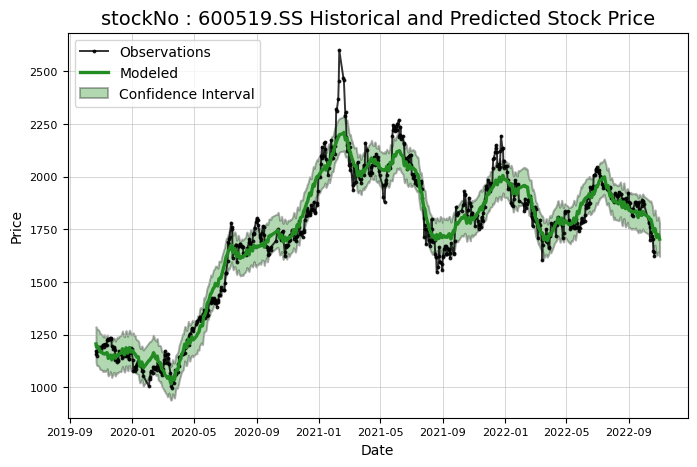

In [4]:
model, model_data = stock.create_prophet_model(days=10)

15:16:01 - cmdstanpy - INFO - Chain [1] start processing
15:16:02 - cmdstanpy - INFO - Chain [1] done processing



Prediction Range: 2021-10-21 00:00:00 to 2022-10-21 00:00:00.

Predicted price on 2022-10-20 00:00:00 = $903.87.
Actual price on    2022-10-20 00:00:00 = $1643.50.

Average Absolute Error on Training Data = $59.38.
Average Absolute Error on Testing  Data = $595.12.

When the model predicted an increase, the price increased 47.56% of the time.
When the model predicted a  decrease, the price decreased  53.75% of the time.

The actual value was within the 80% confidence interval 0.00% of the time.


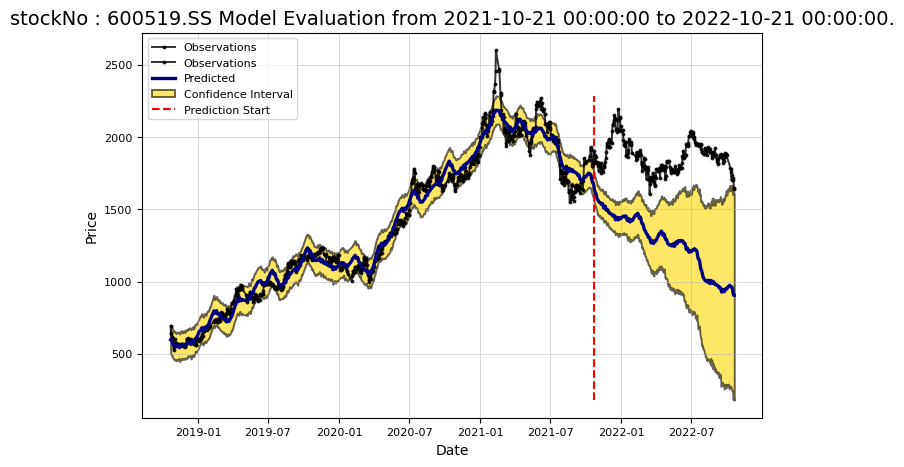

In [5]:
stock.evaluate_prediction()

15:20:22 - cmdstanpy - INFO - Chain [1] start processing
15:20:22 - cmdstanpy - INFO - Chain [1] done processing
15:20:23 - cmdstanpy - INFO - Chain [1] start processing
15:20:24 - cmdstanpy - INFO - Chain [1] done processing
15:20:25 - cmdstanpy - INFO - Chain [1] start processing
15:20:26 - cmdstanpy - INFO - Chain [1] done processing
15:20:28 - cmdstanpy - INFO - Chain [1] start processing
15:20:29 - cmdstanpy - INFO - Chain [1] done processing


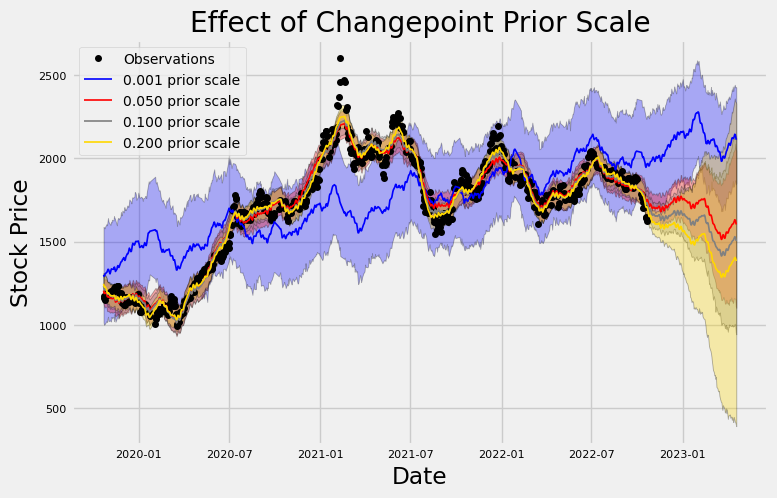

In [6]:
stock.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])

In [7]:
stock.changepoint_prior_scale = 0.5

15:23:20 - cmdstanpy - INFO - Chain [1] start processing
15:23:21 - cmdstanpy - INFO - Chain [1] done processing



Prediction Range: 2021-10-21 00:00:00 to 2022-10-21 00:00:00.

Predicted price on 2022-10-20 00:00:00 = $1793.59.
Actual price on    2022-10-20 00:00:00 = $1643.50.

Average Absolute Error on Training Data = $34.90.
Average Absolute Error on Testing  Data = $164.79.

When the model predicted an increase, the price increased 44.92% of the time.
When the model predicted a  decrease, the price decreased  51.61% of the time.

The actual value was within the 80% confidence interval 94.24% of the time.


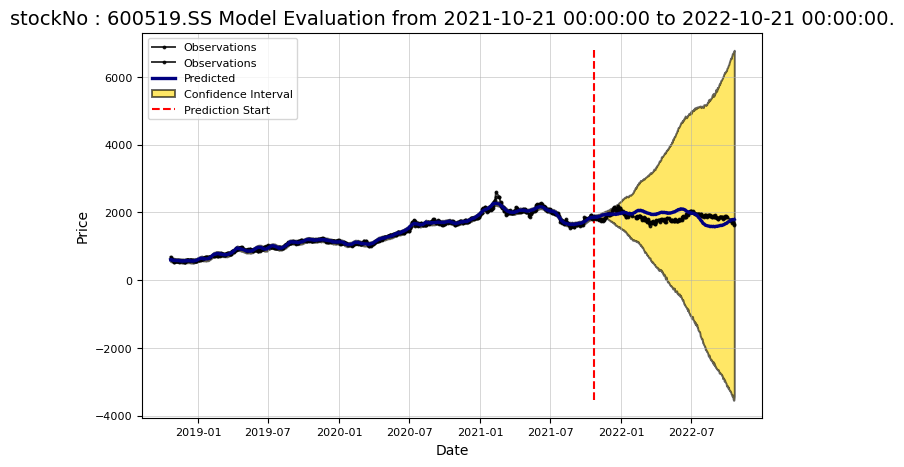

In [8]:
stock.evaluate_prediction()